In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle

/Users/michal/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df_train = pd.read_csv('./train.csv')

In [3]:
def error_rate(pred, target):
    return np.mean(pred!=target)

In [4]:
def classification_rate(p, t):
    return np.mean(p == t)

In [5]:
def ohe(labels):
    ohe_lab = np.zeros((labels.shape[0], len(set(labels))))
    for i in range(len(labels)):
        ohe_lab[i, labels[i]] = 1
    return ohe_lab     

In [6]:
X = df_train.drop('label', axis=1)/255
Y = pd.DataFrame(ohe(df_train['label']))

In [7]:
print(X.shape)
print(type(X))
print(Y.shape)
print(type(Y))

(42000, 784)
<class 'pandas.core.frame.DataFrame'>
(42000, 10)
<class 'pandas.core.frame.DataFrame'>


In [8]:
max_iter = 20
print_period = 10
lr = 0.00004
reg = 0.01

In [9]:
X_train = X[:-1000]
Y_train = Y[:-1000]
X_test = X[-1000:]
Y_test = Y[-1000:]

In [10]:
N, D = X_train.shape
batch_size = 500
num_batches = N//batch_size

In [11]:
# hidden layer1 nodes
M1 = 300
# hidden layer2 nodes
M2 = 100
# output nodes
K = 10
# starting wieghts
W1_init = np.random.randn(D, M1) / np.sqrt(D+M1)
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1+M2)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2+K)
b3_init = np.zeros(K)

In [12]:
# get TF variables for the inputs, X and targets T
ftX = tf.placeholder(tf.float32, shape=(None, D), name='X')
ftT = tf.placeholder(tf.float32, shape=(None, K), name='T')

In [13]:
# get TF variables wieghts and biases
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [14]:
Z1 = tf.nn.relu(tf.matmul(ftX, W1)+b1)
Z2 = tf.nn.relu(tf.matmul(Z1, W2)+b2)
Yish = tf.matmul(Z2, W3)+b3

In [15]:
rcost = reg*sum([tf.nn.l2_loss(W1), tf.nn.l2_loss(b1), 
                 tf.nn.l2_loss(W2), tf.nn.l2_loss(b2), 
                 tf.nn.l2_loss(W3), tf.nn.l2_loss(b3)])
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels=ftT, logits=Yish)) + rcost

In [16]:
train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

In [17]:
pred = tf.argmax(Yish, 1)

In [25]:
LL = []
error = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(max_iter):
#         X_train, Y_train = shuffle(X_train, Y_train)
        for j in range(num_batches):
            X_batch = X_train[(j*batch_size):(j*batch_size+batch_size)]
            Y_batch = Y_train[(j*batch_size):(j*batch_size+batch_size)]
        
            sess.run(train_op, feed_dict = {ftX: X_batch, ftT: Y_batch})
            if j % print_period == 0:
                cost_val = sess.run(cost, feed_dict={ftX: X_test, ftT: Y_test})
                pred_val = sess.run(pred, feed_dict={ftX: X_test})
                err = error_rate(pred_val, Y_test.idxmax(axis = 1))
                print(i,j,cost_val,err)
                LL.append(cost_val)
                error.append(err)

0 0 2311.8806 0.916
0 10 2133.2778 0.45
0 20 1789.5221 0.346
0 30 1304.7751 0.271
0 40 925.9786 0.217
0 50 717.5182 0.18
0 60 611.37 0.165
0 70 543.2096 0.148
0 80 485.69858 0.125
1 0 480.46283 0.126
1 10 442.52713 0.115
1 20 418.58627 0.111
1 30 400.26276 0.105
1 40 376.41776 0.1
1 50 359.38373 0.101
1 60 352.77335 0.096
1 70 341.8551 0.092
1 80 332.37762 0.096
2 0 332.65524 0.094
2 10 321.33188 0.091
2 20 311.4926 0.087
2 30 309.7665 0.09
2 40 296.0313 0.082
2 50 288.97427 0.092
2 60 288.119 0.085
2 70 281.838 0.085
2 80 276.74625 0.082
3 0 278.62488 0.079
3 10 270.82367 0.079
3 20 262.38275 0.072
3 30 263.97894 0.081
3 40 251.60301 0.072
3 50 247.64487 0.074
3 60 246.28233 0.072
3 70 241.19214 0.073
3 80 237.05663 0.067
4 0 239.6391 0.071
4 10 233.96574 0.072
4 20 226.75636 0.065
4 30 228.3309 0.07
4 40 216.35957 0.06
4 50 215.34416 0.06
4 60 212.67366 0.064
4 70 209.87848 0.061
4 80 204.96611 0.057
5 0 207.3517 0.062
5 10 203.39961 0.06
5 20 197.87479 0.054
5 30 196.66588 0.06
5 40

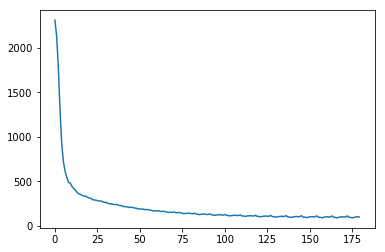

In [26]:
plt.plot(LL)
plt.show()

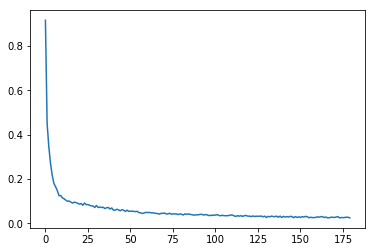

In [27]:
plt.plot(error)
plt.show()

In [28]:
print(X_batch.shape)
print(Y_batch.shape)

(500, 784)
(500, 10)
